# Analiza i opis podataka

### *Za naš projekt pronašli smo skup podataka trgovačkog lanca na Kaggle-u, te ćemo ga sad ovdje opisati i analizirati.*


## Biblioteke:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Uvoz skupa podataka:

In [ ]:
df = pd.read_csv('/content/QVI_data.csv')
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


## Provjera podataka

In [ ]:
specific_product = df[df['PROD_NBR'] == 5]
print(specific_product)

        LYLTY_CARD_NBR        DATE  STORE_NBR    TXN_ID  PROD_NBR  \
0                 1000  2018-10-17        1.0       1.0       5.0   
30                1024  2019-02-20        1.0      31.0       5.0   
166               1150  2019-04-14        1.0     176.0       5.0   
343               1314  2019-02-13        1.0     357.0       5.0   
564               1501  2018-08-07        1.0     581.0       5.0   
...                ...         ...        ...       ...       ...   
257695          264246  2019-01-20      264.0  263003.0       5.0   
257949          264462  2018-08-29      264.0  263262.0       5.0   
258082          265091  2018-09-28      265.0  263400.0       5.0   
258221          265205  2018-09-06      265.0  263541.0       5.0   
258236          265218  2019-01-30      265.0  263556.0       5.0   

                                     PROD_NAME  PROD_QTY  TOT_SALES  \
0       Natural Chip        Compny SeaSalt175g       2.0        6.0   
30      Natural Chip        C

Skup podataka sadrži podatke o prodajama trgovačkog lanca. Skup sadrži sljedeće značajke:

    Loyalty card number - odnosi se na broj kartice vjernosti
    Date - datum prodaje
    Store number - id trgovine gdje je prodaja napravljena
    Transaction identification - id transakcije koju je kupac napravio kupnjom
    Product number - odnosi se na id proizvoda
    Product name - naziv proizvoda
    Product quantity - odnosi se na količinu proizvoda koja je prodana tijekom kupnje
    Total sales - mjera koja predstavlja ukupnu sumu svih prodaja koje je trgovina ostvarila tijekom određenog razdoblja
    Pack size - veličina pakiranja, odnosno težina pakiranja proizvoda
    Brand - odnosi se na marku proizvoda
    Lifestage - dobno razdoblje kupca, navedeno je ima li kupac i obitelj
    Premium customer - govori u kojem je programu kupac

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258422 entries, 0 to 258421
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    258422 non-null  int64  
 1   DATE              258422 non-null  object 
 2   STORE_NBR         258421 non-null  float64
 3   TXN_ID            258421 non-null  float64
 4   PROD_NBR          258421 non-null  float64
 5   PROD_NAME         258421 non-null  object 
 6   PROD_QTY          258421 non-null  float64
 7   TOT_SALES         258421 non-null  float64
 8   PACK_SIZE         258421 non-null  float64
 9   BRAND             258421 non-null  object 
 10  LIFESTAGE         258421 non-null  object 
 11  PREMIUM_CUSTOMER  258421 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 23.7+ MB


In [ ]:
nan_percentage = df.isnull().mean() * 100
print(nan_percentage)

LYLTY_CARD_NBR      0.000000
DATE                0.000000
STORE_NBR           0.000387
TXN_ID              0.000387
PROD_NBR            0.000387
PROD_NAME           0.000387
PROD_QTY            0.000387
TOT_SALES           0.000387
PACK_SIZE           0.000387
BRAND               0.000387
LIFESTAGE           0.000387
PREMIUM_CUSTOMER    0.000387
dtype: float64


In [ ]:
df_selected = df[['PROD_QTY', 'TOT_SALES', 'PACK_SIZE']]

In [ ]:
df_selected.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROD_QTY,258421.0,1.907631,0.341509,1.0,2.0,2.0,2.0,5.0
TOT_SALES,258421.0,7.316838,2.521880,1.5,5.4,7.4,9.2,29.5
PACK_SIZE,258421.0,182.444503,64.391934,70.0,150.0,170.0,175.0,380.0


In [ ]:
df[['LYLTY_CARD_NBR', 'STORE_NBR', 'PROD_NBR']].mode().iloc[0]

LYLTY_CARD_NBR    162039.0
STORE_NBR            226.0
PROD_NBR             102.0
Name: 0, dtype: float64

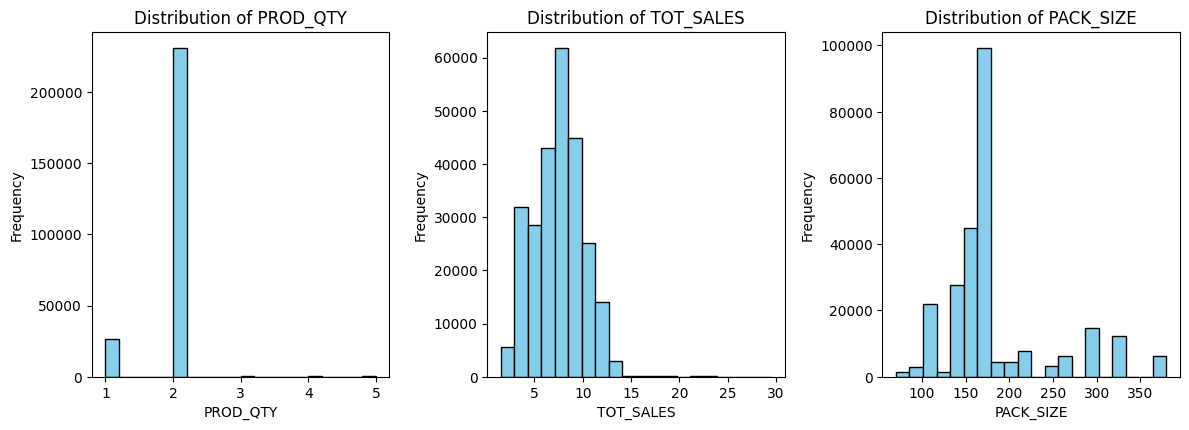

In [ ]:
import matplotlib.pyplot as plt

# Odabir stupaca za prikaz
columns_to_scale = ['PROD_QTY', 'TOT_SALES', 'PACK_SIZE']

# Postavljanje veličine slike
plt.figure(figsize=(12, 8))

# Petlja za iscrtavanje grafikona za svaki odabrani stupac
for i, column in enumerate(columns_to_scale, 1):
    plt.subplot(2, 3, i)  # Postavljanje podgrafikona unutar glavne slike
    plt.hist(df_selected[column], bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribution of " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")

# Prilagodba rasporeda grafova radi bolje čitljivosti
plt.tight_layout()
plt.show()


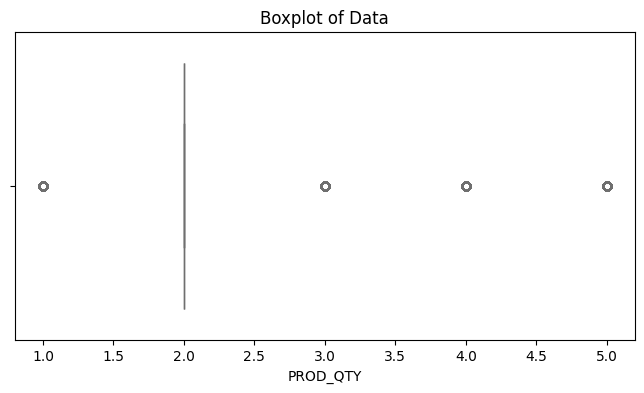

In [ ]:
def detect_outliers_boxplot(data):
    """
    Provjera prisutnosti outliera koristeći boxplot.

    Parametri:
    - data: Serija ili DataFrame stupac s podacima za provjeru
    """
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data, color='skyblue')
    plt.title("Boxplot of Data")
    plt.xlabel(data.name)
    plt.show()

# Primjer korištenja
detect_outliers_boxplot(df_selected['PROD_QTY'])


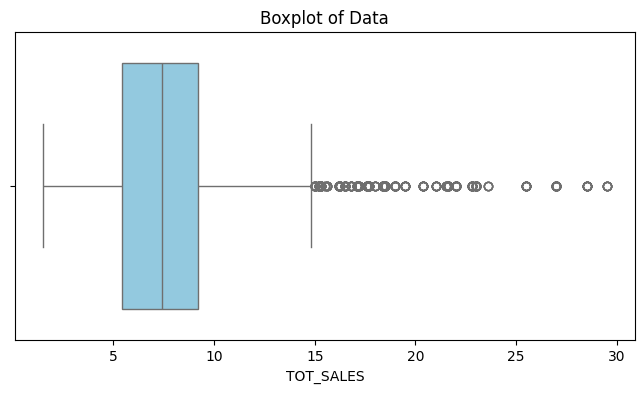

In [ ]:
def detect_outliers_boxplot(data):
    """
    Provjera prisutnosti outliera koristeći boxplot.

    Parametri:
    - data: Serija ili DataFrame stupac s podacima za provjeru
    """
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data, color='skyblue')
    plt.title("Boxplot of Data")
    plt.xlabel(data.name)
    plt.show()

# Primjer korištenja
detect_outliers_boxplot(df_selected['TOT_SALES'])

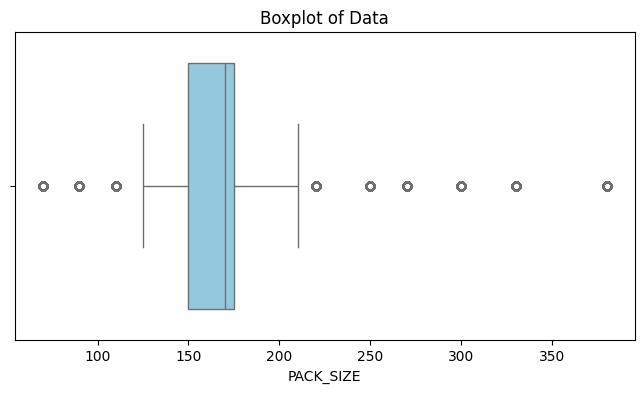

In [ ]:
def detect_outliers_boxplot(data):
    """
    Provjera prisutnosti outliera koristeći boxplot.

    Parametri:
    - data: Serija ili DataFrame stupac s podacima za provjeru
    """
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data, color='skyblue')
    plt.title("Boxplot of Data")
    plt.xlabel(data.name)
    plt.show()

# Primjer korištenja
detect_outliers_boxplot(df_selected['PACK_SIZE'])

In [ ]:
import plotly.express as px

# Stvaranje matrice scatter plotova
fig = px.scatter_matrix(df_selected,
    dimensions=["PROD_QTY", "TOT_SALES", "PACK_SIZE"],
    title="Scatter matrix of selected data set",
    labels={col:col.replace('_', ' ') for col in df_selected.columns}) # Uklanjanje podvlaka iz imena stupaca
fig.update_traces(diagonal_visible=False)  # Sakrij graf na dijagonalnim pozicijama
fig.show()


## Priprema podataka

Izbacujemo odmah DATE jer ga ne budemo koristili u daljnjem radu, te smatramo da nije korisna značajka.

In [ ]:
df=df.drop(columns=['DATE'])

In [ ]:
df2 = df.copy()

Zatim ćemo isti skup kopirati tj. duplicirati, te na jednoj verziji odraditi obradu podataka, a na drugoj ne, kako bi usporedili rad prediktivnih i deskriptivnih modela. Razlog tome je što naši algoritmi otporni na outliere, no svejedno ćemo napraviti obradu da vidimo razliku između obrađenog i neobrađenog skupa.

### Pretvaranje kategorijskih u numeričke

In [ ]:
import pandas as pd

# Pretpostavimo da je df vaš DataFrame
categorical_features = ['LIFESTAGE', 'BRAND', 'PROD_NAME']

# Funkcija za frequency encoding
def frequency_encoding(df, column):
    freq_encoding = df[column].value_counts() / len(df)
    return df[column].map(freq_encoding)

# Primjena frequency encodinga na sve kategoričke značajke
for col in categorical_features:
    df[col] = frequency_encoding(df, col)

# Provjera rezultata
print(df)


        LYLTY_CARD_NBR  STORE_NBR  TXN_ID  PROD_NBR  PROD_NAME  PROD_QTY  \
0                 1000          1       1         5   0.005543         2   
1                 1002          1       2        58   0.005415         1   
2                 1003          1       3        52   0.011724         1   
3                 1003          1       4       106   0.005513         1   
4                 1004          1       5        96   0.005615         1   
...                ...        ...     ...       ...        ...       ...   
264829         2370701         88  240378        24   0.011958         2   
264830         2370751         88  240394        60   0.011849         2   
264831         2370961         88  240480        70   0.011985         2   
264832         2370961         88  240481        65   0.011800         2   
264833         2373711         88  241815        16   0.012072         2   

        TOT_SALES  PACK_SIZE     BRAND  LIFESTAGE PREMIUM_CUSTOMER  
0             6.0 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Definirajte redoslijed kategorija za stupac "Education"
redoslijed = ['Budget', 'Mainstream', 'Premium']

# Stvorite instancu OrdinalEncoder i navedite redoslijed
ordinal_encoder = OrdinalEncoder(categories=[redoslijed])

df['Premium_encoded'] = ordinal_encoder.fit_transform(df[['PREMIUM_CUSTOMER']])

# Prikaz ažuriranog DataFramea
df.head(10)

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Premium_encoded
0,1000,1,1,5,0.005543,2,6.0,175,0.028203,0.137358,Premium,2.0
1,1002,1,2,58,0.005415,1,2.7,150,0.067133,0.137358,Mainstream,1.0
2,1003,1,3,52,0.011724,1,3.6,210,0.029226,0.164601,Budget,0.0
3,1003,1,4,106,0.005513,1,3.0,175,0.028203,0.164601,Budget,0.0
4,1004,1,5,96,0.005615,1,1.9,160,0.055722,0.205710,Mainstream,1.0
5,1005,1,6,86,0.005468,1,2.8,165,0.011052,0.094814,Mainstream,1.0
6,1007,1,7,49,0.011834,1,3.8,110,0.053622,0.137358,Budget,0.0
7,1007,1,8,10,0.005762,1,2.7,150,0.067133,0.137358,Budget,0.0
8,1009,1,9,20,0.011524,1,5.7,330,0.106274,0.026126,Premium,2.0
9,1010,1,10,51,0.011762,2,8.8,170,0.106274,0.137358,Mainstream,1.0


In [ ]:
df = df.drop(columns=['PREMIUM_CUSTOMER'])

In [ ]:
df

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,Premium_encoded
0,1000,1,1,5,0.005543,2,6.0,175,0.028203,0.137358,2.0
1,1002,1,2,58,0.005415,1,2.7,150,0.067133,0.137358,1.0
2,1003,1,3,52,0.011724,1,3.6,210,0.029226,0.164601,0.0
3,1003,1,4,106,0.005513,1,3.0,175,0.028203,0.164601,0.0
4,1004,1,5,96,0.005615,1,1.9,160,0.055722,0.205710,1.0
...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,88,240378,24,0.011958,2,7.2,210,0.029226,0.164601,1.0
264830,2370751,88,240394,60,0.011849,2,9.2,150,0.155901,0.164601,2.0
264831,2370961,88,240480,70,0.011985,2,8.4,165,0.024325,0.183489,0.0
264832,2370961,88,240481,65,0.011800,2,10.2,300,0.035207,0.183489,0.0


Sada ćemo promjene raditi samo na jednom skupu tj. skupu df1.

In [ ]:
df2

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [ ]:
df1 = df2.select_dtypes(include=['number'])

In [ ]:
df1

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
0,1000,1,1,5,2,6.0,175
1,1002,1,2,58,1,2.7,150
2,1003,1,3,52,1,3.6,210
3,1003,1,4,106,1,3.0,175
4,1004,1,5,96,1,1.9,160
...,...,...,...,...,...,...,...
264829,2370701,88,240378,24,2,7.2,210
264830,2370751,88,240394,60,2,9.2,150
264831,2370961,88,240480,70,2,8.4,165
264832,2370961,88,240481,65,2,10.2,300


Uklanjanje outliera na df1.

In [ ]:
import pandas as pd

# Identifikacija outlier-a
def identify_outliers(df1, feature):
    q1 = df1[feature].quantile(0.25)
    q3 = df1[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df1[(df1[feature] < lower_bound) | (df1[feature] > upper_bound)]

# Identifikacija outlier-a za sve značajke
outliers_all_features = {}
for feature in df1.columns:
    outliers_all_features[feature] = identify_outliers(df1, feature)

# Ispis outlier-a za svaku značajku
for feature, outliers in outliers_all_features.items():
    print(f"Outlier-i za značajku '{feature}':")
    print(outliers)
    print("Broj pronađenih outlier-a:", len(outliers))
    print()

# Uklanjanje outlier-a za sve značajke
for feature, outliers in outliers_all_features.items():
    df1 = df1[~df1.index.isin(outliers.index)]

# Provjera uklanjanja outlier-a
print("Nakon uklanjanja outlier-a:")
print(df1)


Outlier-i za značajku 'LYLTY_CARD_NBR':
        LYLTY_CARD_NBR  STORE_NBR  TXN_ID  PROD_NBR  PROD_QTY  TOT_SALES  \
264790          861921        155   85336         4         2       13.0   
264791          861951        155   85355        28         2        6.6   
264792          861961        155   85362        11         2        6.0   
264793          862501        155   85677        78         2        6.6   
264794          862501        155   85678        16         2       11.4   
264795          880171        237   86305        32         2       10.8   
264796          880171        237   86306        24         2        7.2   
264797          880551        237   86491        59         2       10.2   
264798          880711        237   86566        31         2        7.6   
264799          880711        237   86567         3         2        9.2   
264800          883791        237   88099        87         2        7.6   
264801          883791        237   88100       

Nakon uklanjanja outliera primjetno je da atribut PROD_QTY ostaje samo s jednom vrijednosti a to je 2 te radi toga se odlučuje izbacit jer nije više informativna značajka u skupu podataka d1. Izbacivanje kolone s konstantnom vrijednošću je korak u čišćenju podataka koji osigurava da samo informativni i varijabilni podaci ulaze u analizu i modeliranje. Time se poboljšava učinkovitost obrade podataka i preciznost modela.

In [ ]:
jedinstvene_vrijednosti = df1['PROD_QTY'].unique()
print(jedinstvene_vrijednosti)

[2]


In [ ]:
df1 = df1.drop(columns=['PROD_QTY'])

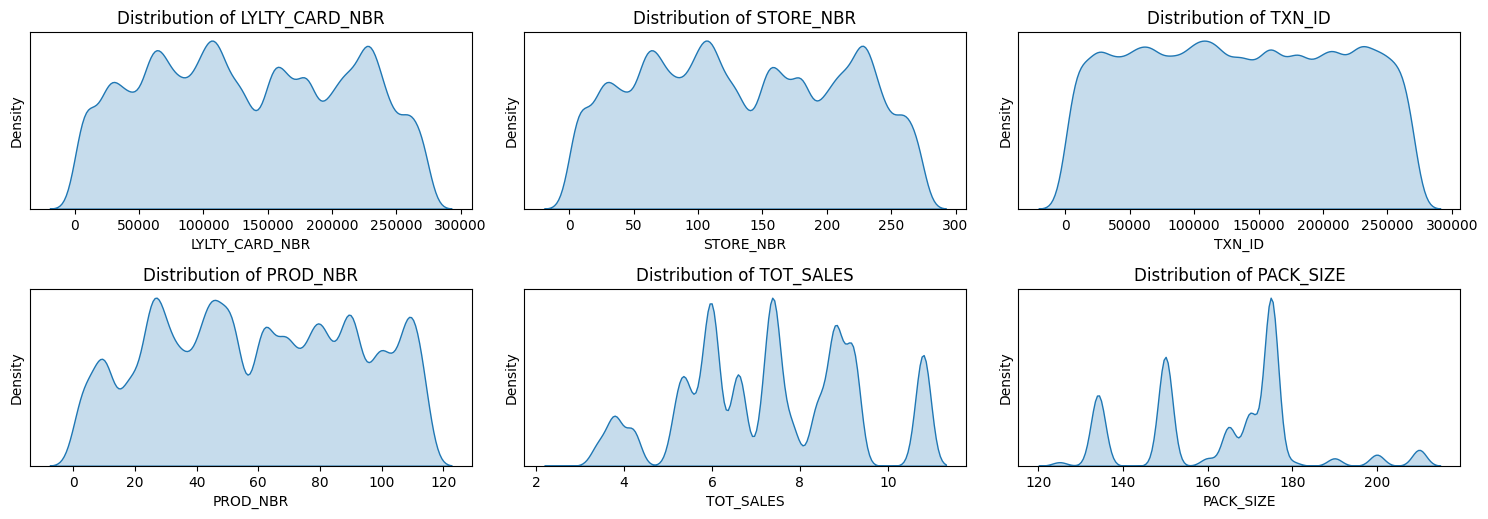

In [ ]:
columns_to_scale = df1.columns
# Postavite broj redaka i stupaca za podgrafikone
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Izravnajte array axs za jednostavnije iteriranje
axs = axs.flatten()

# Kreirajte KDE plot za svaki stupac
for i in range(len(columns_to_scale)):
    sns.kdeplot(x=columns_to_scale[i], data=df1, fill=True, ax=axs[i])
    axs[i].set_title("Distribution of " + columns_to_scale[i])
    axs[i].set_yticks([])

# Uklonite nepotrebne podgrafikone ako ih ima
for j in range(len(columns_to_scale), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sačuvajte originalne indekse i nazive stupaca
original_index = df1.index
original_columns = df1.columns

# Normalizacija numeričkih podataka u DataFrame-u df1 koristeći MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df1)

# Stvorite novi DataFrame koristeći normalizirane podatke s originalnim indeksima i nazivima stupaca
df1 = pd.DataFrame(scaled_values, index=original_index, columns=original_columns)

# Provjera rezultata
print(df1.head())


    LYLTY_CARD_NBR  STORE_NBR    TXN_ID  PROD_NBR  TOT_SALES  PACK_SIZE
0         0.000000        0.0  0.000000  0.035398   0.407407   0.588235
9         0.000037        0.0  0.000033  0.442478   0.753086   0.529412
11        0.000041        0.0  0.000041  0.734513   0.432099   0.647059
18        0.000048        0.0  0.000067  0.796460   0.185185   0.588235
31        0.000092        0.0  0.000115  0.601770   0.407407   0.588235


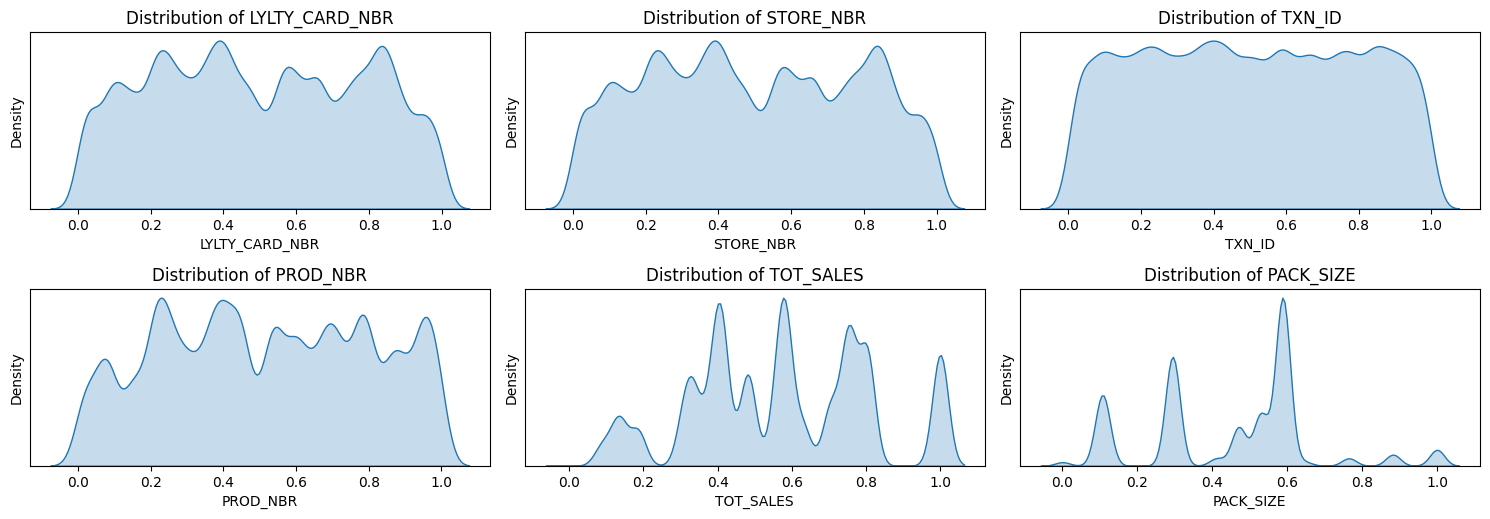

In [ ]:
columns_to_scale = df1.columns
# Postavite broj redaka i stupaca za podgrafikone
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Izravnajte array axs za jednostavnije iteriranje
axs = axs.flatten()

# Kreirajte KDE plot za svaki stupac
for i in range(len(columns_to_scale)):
    sns.kdeplot(x=columns_to_scale[i], data=df1, fill=True, ax=axs[i])
    axs[i].set_title("Distribution of " + columns_to_scale[i])
    axs[i].set_yticks([])

# Uklonite nepotrebne podgrafikone ako ih ima
for j in range(len(columns_to_scale), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [ ]:
df1

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,TOT_SALES,PACK_SIZE
0,0.000000,0.0,0.000000,0.035398,0.407407,0.588235
9,0.000037,0.0,0.000033,0.442478,0.753086,0.529412
11,0.000041,0.0,0.000041,0.734513,0.432099,0.647059
18,0.000048,0.0,0.000067,0.796460,0.185185,0.588235
31,0.000092,0.0,0.000115,0.601770,0.407407,0.588235
...,...,...,...,...,...,...
264784,0.999993,1.0,0.999981,0.982301,0.703704,0.470588
264785,0.999996,1.0,0.999985,0.548673,0.703704,0.117647
264786,1.000000,1.0,0.999989,0.610619,0.703704,0.470588
264788,1.000000,1.0,0.999996,0.707965,0.580247,0.105882


In [ ]:
# Spremanje indeksa iz df1
df1_indexes = df1.index

# Filtriranje df1 koristeći indekse iz df1
filtered_df2 = df2.loc[df1_indexes]

# Brisanje odabranih stupaca iz filtered_df2
numeric_cols = filtered_df2.select_dtypes(include=['number']).columns
filtered_df2 = filtered_df2.drop(columns=numeric_cols)

# Spajanje stupaca iz df1 na filtered_df2
merged_df = pd.concat([filtered_df2, df1], axis=1)

# Ispisivanje prvih nekoliko redova spojenog DataFrame-a radi provjere
print(merged_df.head())


                                 PROD_NAME    BRAND              LIFESTAGE  \
0   Natural Chip        Compny SeaSalt175g  NATURAL  YOUNG SINGLES/COUPLES   
9                 Doritos Mexicana    170g  DORITOS  YOUNG SINGLES/COUPLES   
11   GrnWves Plus Btroot & Chilli Jam 180g  GRNWVES  OLDER SINGLES/COUPLES   
18                CCs Tasty Cheese    175g      CCS               RETIREES   
31  Smiths Chip Thinly  S/Cream&Onion 175g   SMITHS         YOUNG FAMILIES   

   PREMIUM_CUSTOMER  LYLTY_CARD_NBR  STORE_NBR    TXN_ID  PROD_NBR  TOT_SALES  \
0           Premium        0.000000        0.0  0.000000  0.035398   0.407407   
9        Mainstream        0.000037        0.0  0.000033  0.442478   0.753086   
11       Mainstream        0.000041        0.0  0.000041  0.734513   0.432099   
18           Budget        0.000048        0.0  0.000067  0.796460   0.185185   
31           Budget        0.000092        0.0  0.000115  0.601770   0.407407   

    PACK_SIZE  
0    0.588235  
9    0.52941

In [ ]:
merged_df

,PROD_NAME,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,TOT_SALES,PACK_SIZE
0,Natural Chip Compny SeaSalt175g,NATURAL,YOUNG SINGLES/COUPLES,Premium,0.000000,0.0,0.000000,0.035398,0.407407,0.588235
9,Doritos Mexicana 170g,DORITOS,YOUNG SINGLES/COUPLES,Mainstream,0.000037,0.0,0.000033,0.442478,0.753086,0.529412
11,GrnWves Plus Btroot & Chilli Jam 180g,GRNWVES,OLDER SINGLES/COUPLES,Mainstream,0.000041,0.0,0.000041,0.734513,0.432099,0.647059
18,CCs Tasty Cheese 175g,CCS,RETIREES,Budget,0.000048,0.0,0.000067,0.796460,0.185185,0.588235
31,Smiths Chip Thinly S/Cream&Onion 175g,SMITHS,YOUNG FAMILIES,Budget,0.000092,0.0,0.000115,0.601770,0.407407,0.588235
...,...,...,...,...,...,...,...,...,...,...
264784,Tyrrells Crisps Ched & Chives 165g,TYRRELLS,NEW FAMILIES,Budget,0.999993,1.0,0.999981,0.982301,0.703704,0.470588
264785,Kettle 135g Swt Pot Sea Salt,KETTLE,YOUNG SINGLES/COUPLES,Mainstream,0.999996,1.0,0.999985,0.548673,0.703704,0.117647
264786,Tyrrells Crisps Lightly Salted 165g,TYRRELLS,MIDAGE SINGLES/COUPLES,Premium,1.000000,1.0,0.999989,0.610619,0.703704,0.470588
264788,Pringles Original Crisps 134g,PRINGLES,MIDAGE SINGLES/COUPLES,Premium,1.000000,1.0,0.999996,0.707965,0.580247,0.105882


In [ ]:
import pandas as pd

categorical_features = ['LIFESTAGE', 'BRAND', 'PROD_NAME']

# Funkcija za frequency encoding
def frequency_encoding(merged_df, column):
    freq_encoding = merged_df[column].value_counts() / len(merged_df)
    return merged_df[column].map(freq_encoding)

# Primjena frequency encodinga na sve kategoričke značajke
for col in categorical_features:
    merged_df[col] = frequency_encoding(merged_df, col)

# Provjera rezultata
print(merged_df)


        PROD_NAME     BRAND  LIFESTAGE PREMIUM_CUSTOMER  LYLTY_CARD_NBR  \
0        0.007421  0.037943   0.124533          Premium        0.000000   
9        0.016421  0.099834   0.124533       Mainstream        0.000037   
11       0.007415  0.040153   0.207328       Mainstream        0.000041   
18       0.007730  0.023224   0.184016           Budget        0.000048   
31       0.007473  0.113545   0.172241           Budget        0.000092   
...           ...       ...        ...              ...             ...   
264784   0.017057  0.033641   0.024886           Budget        0.999993   
264785   0.017039  0.216794   0.124533       Mainstream        0.999996   
264786   0.016585  0.033641   0.093503          Premium        1.000000   
264788   0.016445  0.131225   0.093503          Premium        1.000000   
264789   0.016246  0.073724   0.093503          Premium        1.000000   

        STORE_NBR    TXN_ID  PROD_NBR  TOT_SALES  PACK_SIZE  
0             0.0  0.000000  0.035398

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Definirajte redoslijed kategorija za stupac "Education"
redoslijed = ['Budget', 'Mainstream', 'Premium']

# Stvorite instancu OrdinalEncoder i navedite redoslijed
ordinal_encoder = OrdinalEncoder(categories=[redoslijed])

merged_df['Premium_encoded'] = ordinal_encoder.fit_transform(merged_df[['PREMIUM_CUSTOMER']])

# Prikaz ažuriranog DataFramea
merged_df.head(10)

,PROD_NAME,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,TOT_SALES,PACK_SIZE,Premium_encoded
0,0.007421,0.037943,0.124533,Premium,0.000000,0.0,0.000000,0.035398,0.407407,0.588235,2.0
9,0.016421,0.099834,0.124533,Mainstream,0.000037,0.0,0.000033,0.442478,0.753086,0.529412,1.0
11,0.007415,0.040153,0.207328,Mainstream,0.000041,0.0,0.000041,0.734513,0.432099,0.647059,1.0
18,0.007730,0.023224,0.184016,Budget,0.000048,0.0,0.000067,0.796460,0.185185,0.588235,0.0
31,0.007473,0.113545,0.172241,Budget,0.000092,0.0,0.000115,0.601770,0.407407,0.588235,0.0
36,0.007736,0.090816,0.184016,Mainstream,0.000111,0.0,0.000133,0.079646,0.333333,0.294118,1.0
39,0.007683,0.090816,0.193494,Mainstream,0.000140,0.0,0.000148,0.460177,0.407407,0.470588,1.0
52,0.007456,0.113545,0.124533,Budget,0.000188,0.0,0.000204,0.061947,0.382716,0.529412,0.0
63,0.016585,0.033641,0.124533,Mainstream,0.000221,0.0,0.000244,0.610619,0.703704,0.470588,1.0
79,0.007491,0.113545,0.024886,Premium,0.000265,0.0,0.000307,0.637168,0.382716,0.529412,2.0


In [ ]:
df1 = merged_df.drop(columns=['PREMIUM_CUSTOMER'])

Sada će se odraditi vif za df1 prije nego odradimo potrebno je izbaciti ciljanu

Pošto je nama tot_sales ciljan atirbut a prema vif-u bi bio izbačen odvojit ćemo ga te nakon vif ponovno vratiti u df1.

In [ ]:
df_tot_sales = df1[['TOT_SALES']]

In [ ]:
df_tot_sales

,TOT_SALES
0,0.407407
9,0.753086
11,0.432099
18,0.185185
31,0.407407
...,...
264784,0.703704
264785,0.703704
264786,0.703704
264788,0.580247


In [ ]:
df1 = df1.drop(columns=['TOT_SALES'])

In [ ]:
df1

,PROD_NAME,BRAND,LIFESTAGE,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PACK_SIZE,Premium_encoded
0,0.007421,0.037943,0.124533,0.000000,0.0,0.000000,0.035398,0.588235,2.0
9,0.016421,0.099834,0.124533,0.000037,0.0,0.000033,0.442478,0.529412,1.0
11,0.007415,0.040153,0.207328,0.000041,0.0,0.000041,0.734513,0.647059,1.0
18,0.007730,0.023224,0.184016,0.000048,0.0,0.000067,0.796460,0.588235,0.0
31,0.007473,0.113545,0.172241,0.000092,0.0,0.000115,0.601770,0.588235,0.0
...,...,...,...,...,...,...,...,...,...
264784,0.017057,0.033641,0.024886,0.999993,1.0,0.999981,0.982301,0.470588,0.0
264785,0.017039,0.216794,0.124533,0.999996,1.0,0.999985,0.548673,0.117647,1.0
264786,0.016585,0.033641,0.093503,1.000000,1.0,0.999989,0.610619,0.470588,2.0
264788,0.016445,0.131225,0.093503,1.000000,1.0,0.999996,0.707965,0.105882,2.0


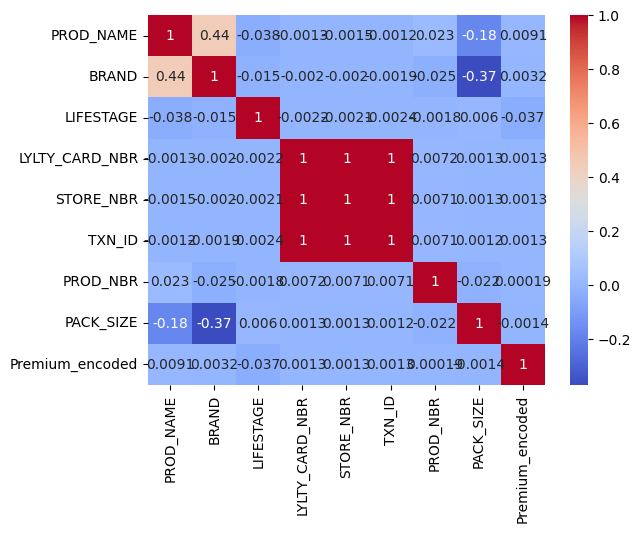

         variables           VIF
0        PROD_NAME     10.794370
1            BRAND      5.451379
2        LIFESTAGE     10.529893
3   LYLTY_CARD_NBR  37049.869836
4        STORE_NBR  31284.359120
5           TXN_ID   5358.307871
6         PROD_NBR      4.038398
7        PACK_SIZE      4.888844
8  Premium_encoded      2.269566


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Korelacijski matriks
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Funkcija za računanje VIF-a
def calculate_vif(df1):
    vif = pd.DataFrame()
    vif["variables"] = df1.columns
    vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return vif

# Računanje VIF-a za numeričke značajke
numerical_features_vif = df1.drop(columns=['Transaction identification', 'Store number'], errors='ignore')
vif_data = calculate_vif(numerical_features_vif)
print(vif_data)


In [ ]:
# Iterativno uklanjanje varijabli s visokim VIF-om
def remove_high_vif(df1, threshold=10):
    while True:
        vif_data = calculate_vif(df1)
        max_vif = vif_data["VIF"].max()
        if max_vif > threshold:
            max_vif_var = vif_data.loc[vif_data["VIF"].idxmax(), "variables"]
            df1 = df1.drop(columns=[max_vif_var])
            print(f'Uklanjam varijablu {max_vif_var} s VIF-om {max_vif}')
        else:
            break
    return df1

# Primjena funkcije
cleaned_df = remove_high_vif(numerical_features_vif, threshold=10)
print("Preostale varijable nakon uklanjanja visokog VIF-a:")
print(cleaned_df.columns)


Uklanjam varijablu LYLTY_CARD_NBR s VIF-om 37049.86983647365
Uklanjam varijablu STORE_NBR s VIF-om 4583.581428322988
Uklanjam varijablu PROD_NAME s VIF-om 10.771911887794875
Preostale varijable nakon uklanjanja visokog VIF-a:
Index(['BRAND', 'LIFESTAGE', 'TXN_ID', 'PROD_NBR', 'PACK_SIZE',
       'Premium_encoded'],
      dtype='object')


In [ ]:
final_vif_data = calculate_vif(cleaned_df)
print("Final VIF values:")
print(final_vif_data)

Final VIF values:
         variables       VIF
0            BRAND  3.732986
1        LIFESTAGE  9.549756
2           TXN_ID  3.734325
3         PROD_NBR  3.921975
4        PACK_SIZE  4.684363
5  Premium_encoded  2.249696


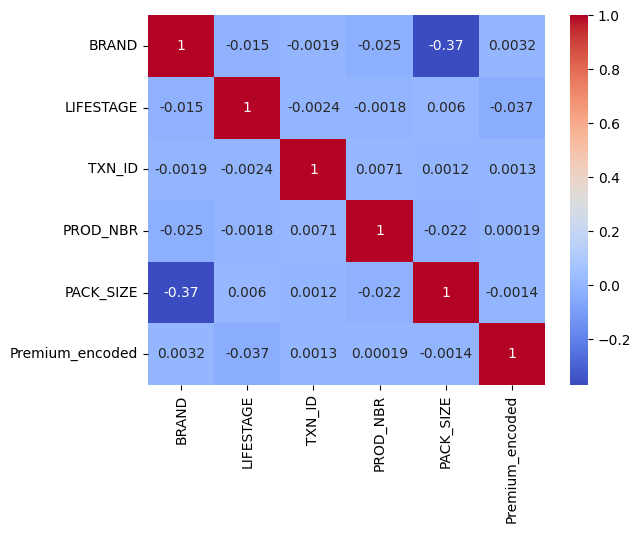

In [ ]:
correlation_matrix = cleaned_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

i sada ćemo vratiti tot_sales u cleaned_df koji je zapravo df1 koji je prošato kroz uklanjanje multikolinearnosti.

In [ ]:
cleaned_df = cleaned_df.join(df_tot_sales)

In [ ]:
cleaned_df

,BRAND,LIFESTAGE,TXN_ID,PROD_NBR,PACK_SIZE,Premium_encoded,TOT_SALES
0,0.037943,0.124533,0.000000,0.035398,0.588235,2.0,0.407407
9,0.099834,0.124533,0.000033,0.442478,0.529412,1.0,0.753086
11,0.040153,0.207328,0.000041,0.734513,0.647059,1.0,0.432099
18,0.023224,0.184016,0.000067,0.796460,0.588235,0.0,0.185185
31,0.113545,0.172241,0.000115,0.601770,0.588235,0.0,0.407407
...,...,...,...,...,...,...,...
264784,0.033641,0.024886,0.999981,0.982301,0.470588,0.0,0.703704
264785,0.216794,0.124533,0.999985,0.548673,0.117647,1.0,0.703704
264786,0.033641,0.093503,0.999989,0.610619,0.470588,2.0,0.703704
264788,0.131225,0.093503,0.999996,0.707965,0.105882,2.0,0.580247


Sada će se isprobati deskriptivni model kao što je DBSCAN na podacima koji su prošli kroz sklairanje, micanje outliera i uklanjanje mulitkolinearnosti tj. u ovom slučaju to je cleaned_df. Nakon toga će se isto provesti i na podacima koji nisu prošli sve navedeno, a ti podaci su df.

## Deskriptivni model

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Original number of rows: 171545
Sampled number of rows: 10000
Silhouette koeficijent: 0.4086998235307069


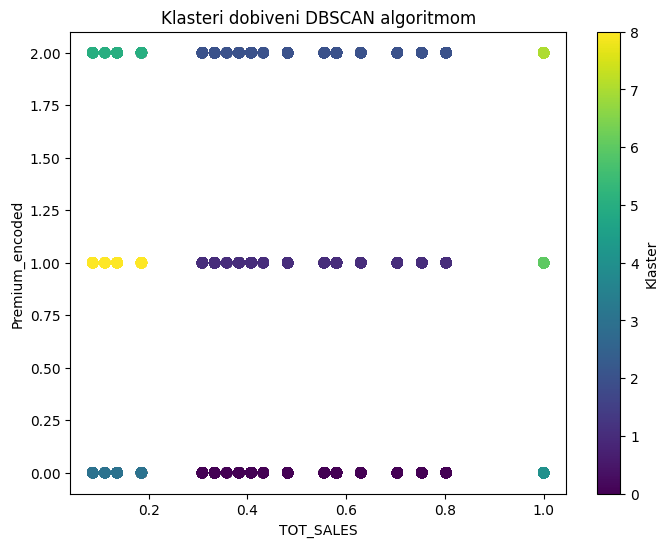

In [ ]:
# Provjerimo broj podataka
print(f"Original number of rows: {len(cleaned_df)}")

# Uzmimo uzorak podataka ako imamo puno redaka
sample_size = 10000  # Na primjer, 10000 redaka
if len(cleaned_df) > sample_size:
    cleaned_df_sampled = cleaned_df.sample(n=sample_size, random_state=42)
else:
   cleaned_df_sampled = cleaned_df

print(f"Sampled number of rows: {len(cleaned_df_sampled)}")

# Podaci za klasteriranje
X = cleaned_df_sampled[['TOT_SALES', 'Premium_encoded']]

# Inicijalizacija i primjena DBSCAN algoritma
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Silhouette koeficijent
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette koeficijent: {silhouette_avg}")
else:
    print("Nedovoljno klastera za izračun Silhouette koeficijenta.")

# Vizualizacija klastera
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('TOT_SALES')
plt.ylabel('Premium_encoded')
plt.title('Klasteri dobiveni DBSCAN algoritmom')
plt.colorbar(label='Klaster')
plt.show()

Sada će se isto napraviti, ali za df kao što je navedeno.

Original number of rows: 264834
Sampled number of rows: 10000
Silhouette koeficijent: 0.9345706590946614


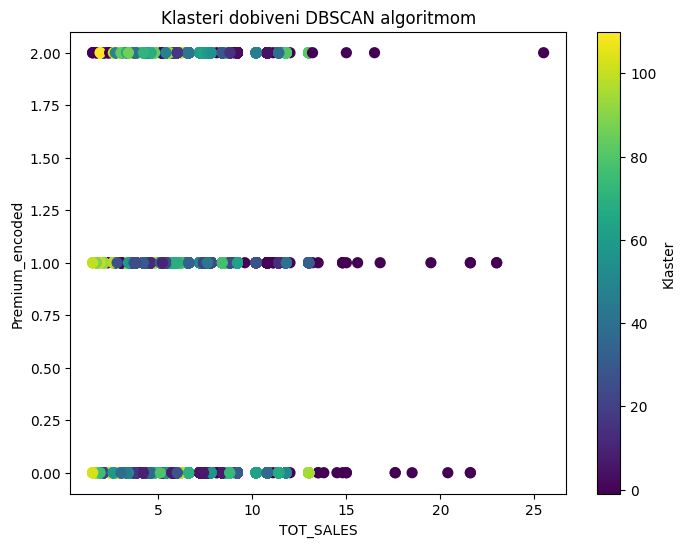

In [ ]:
# Provjerimo broj podataka
print(f"Original number of rows: {len(df)}")

# Uzmimo uzorak podataka ako imamo puno redaka
sample_size = 10000  # Na primjer, 10000 redaka
if len(df) > sample_size:
    df_sampled = df.sample(n=sample_size, random_state=42)
else:
    df_sampled = df

print(f"Sampled number of rows: {len(df_sampled)}")

# Podaci za klasteriranje
X = df_sampled[['TOT_SALES', 'Premium_encoded']]

# Inicijalizacija i primjena DBSCAN algoritma
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Silhouette koeficijent
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette koeficijent: {silhouette_avg}")
else:
    print("Nedovoljno klastera za izračun Silhouette koeficijenta.")

# Vizualizacija klastera
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('TOT_SALES')
plt.ylabel('Premium_encoded')
plt.title('Klasteri dobiveni DBSCAN algoritmom')
plt.colorbar(label='Klaster')
plt.show()


Sada će se isto provesti, ali s drugim atributima.

Original number of rows: 171545
Sampled number of rows: 10000
Silhouette koeficijent: 0.424155369244345


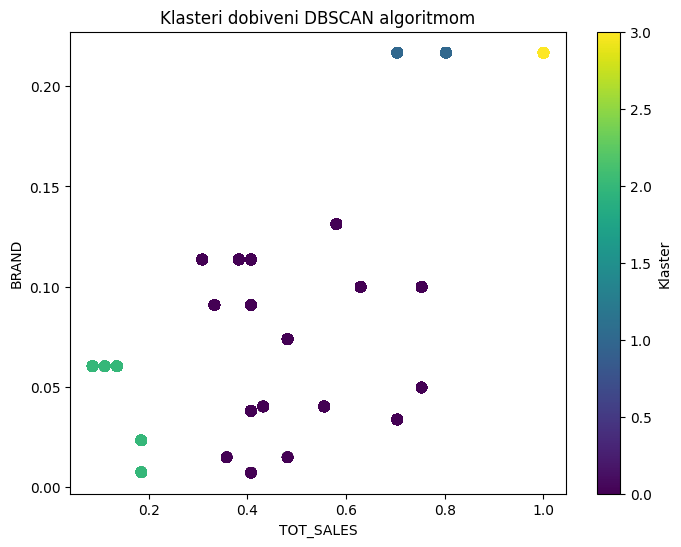

In [ ]:
# Provjerimo broj podataka
print(f"Original number of rows: {len(cleaned_df)}")

# Uzmimo uzorak podataka ako imamo puno redaka
sample_size = 10000  # Na primjer, 10000 redaka
if len(cleaned_df) > sample_size:
    cleaned_df_sampled = cleaned_df.sample(n=sample_size, random_state=42)
else:
    cleaned_df_sampled = cleaned_df

print(f"Sampled number of rows: {len(cleaned_df_sampled)}")

# Podaci za klasteriranje
X = cleaned_df_sampled[['TOT_SALES', 'BRAND']]

# Inicijalizacija i primjena DBSCAN algoritma
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Silhouette koeficijent
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette koeficijent: {silhouette_avg}")
else:
    print("Nedovoljno klastera za izračun Silhouette koeficijenta.")

# Vizualizacija klastera
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('TOT_SALES')
plt.ylabel('BRAND')
plt.title('Klasteri dobiveni DBSCAN algoritmom')
plt.colorbar(label='Klaster')
plt.show()


Original number of rows: 264834
Sampled number of rows: 10000
Silhouette koeficijent: 0.920124847706906


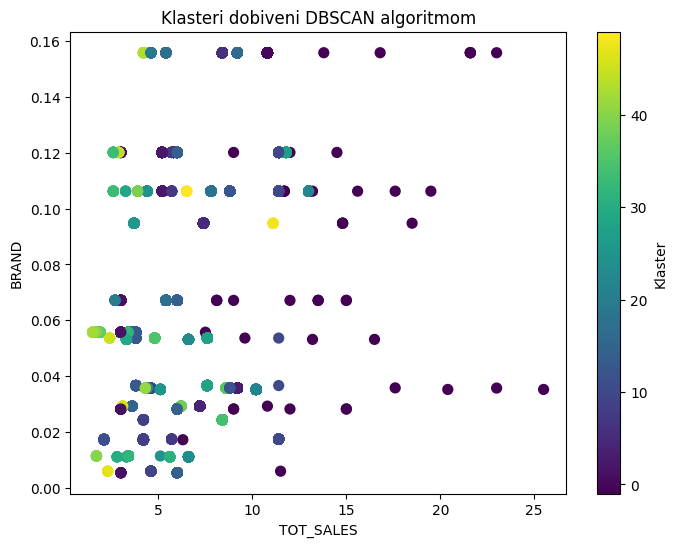

In [ ]:
# Provjerimo broj podataka
print(f"Original number of rows: {len(df)}")

# Uzmimo uzorak podataka ako imamo puno redaka
sample_size = 10000  # Na primjer, 10000 redaka
if len(df) > sample_size:
    df_sampled = df.sample(n=sample_size, random_state=42)
else:
    df_sampled = df

print(f"Sampled number of rows: {len(df_sampled)}")

# Podaci za klasteriranje
X = df_sampled[['TOT_SALES', 'BRAND']]

# Inicijalizacija i primjena DBSCAN algoritma
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Silhouette koeficijent
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette koeficijent: {silhouette_avg}")
else:
    print("Nedovoljno klastera za izračun Silhouette koeficijenta.")

# Vizualizacija klastera
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('TOT_SALES')
plt.ylabel('BRAND')
plt.title('Klasteri dobiveni DBSCAN algoritmom')
plt.colorbar(label='Klaster')
plt.show()


U ovom slučaju smo stavili PACK_SIZE, te dobili vrlo dobre rezultate i za jedan i za drugi skup.

Original number of rows: 171545
Sampled number of rows: 10000
Silhouette koeficijent: 0.8576944094796594


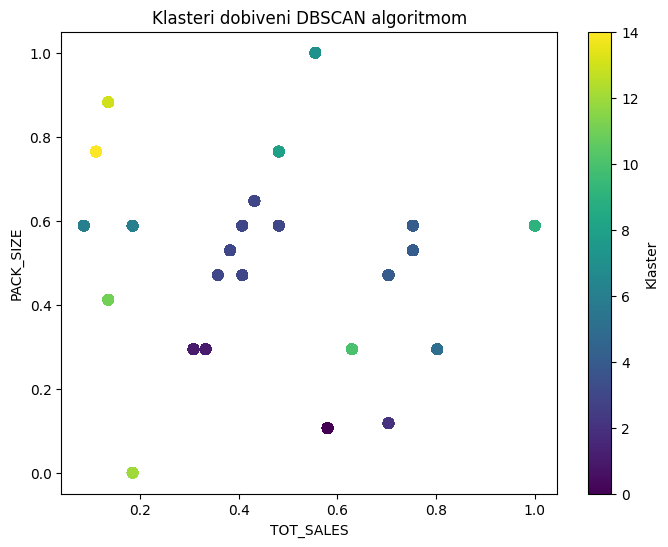

In [ ]:
# Provjerimo broj podataka
print(f"Original number of rows: {len(cleaned_df)}")

# Uzmimo uzorak podataka ako imamo puno redaka
sample_size = 10000  # Na primjer, 10000 redaka
if len(cleaned_df) > sample_size:
    cleaned_df_sampled = cleaned_df.sample(n=sample_size, random_state=42)
else:
   cleaned_df_sampled = cleaned_df

print(f"Sampled number of rows: {len(cleaned_df_sampled)}")

# Podaci za klasteriranje
X = cleaned_df_sampled[['TOT_SALES', 'PACK_SIZE']]

# Inicijalizacija i primjena DBSCAN algoritma
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Silhouette koeficijent
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette koeficijent: {silhouette_avg}")
else:
    print("Nedovoljno klastera za izračun Silhouette koeficijenta.")

# Vizualizacija klastera
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('TOT_SALES')
plt.ylabel('PACK_SIZE')
plt.title('Klasteri dobiveni DBSCAN algoritmom')
plt.colorbar(label='Klaster')
plt.show()

Original number of rows: 264834
Sampled number of rows: 10000
Silhouette koeficijent: 0.9896529089340913


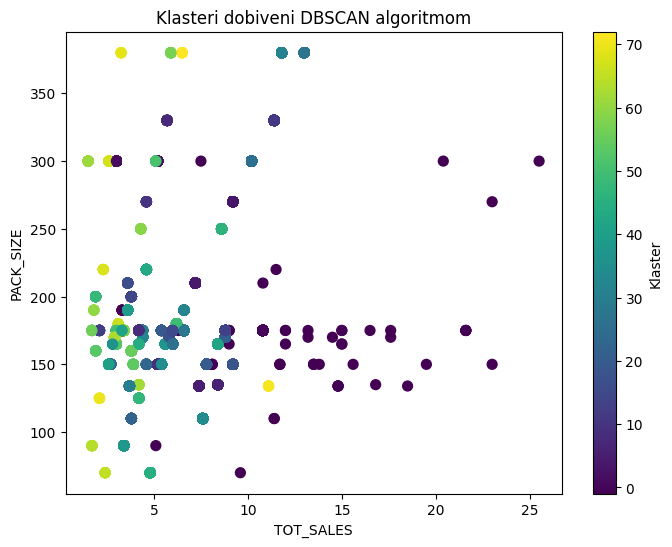

In [ ]:
# Provjerimo broj podataka
print(f"Original number of rows: {len(df)}")

# Uzmimo uzorak podataka ako imamo puno redaka
sample_size = 10000  # Na primjer, 10000 redaka
if len(df) > sample_size:
    df_sampled = df.sample(n=sample_size, random_state=42)
else:
    df_sampled = df

print(f"Sampled number of rows: {len(df_sampled)}")

# Podaci za klasteriranje
X = df_sampled[['TOT_SALES', 'PACK_SIZE']]

# Inicijalizacija i primjena DBSCAN algoritma
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Silhouette koeficijent
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette koeficijent: {silhouette_avg}")
else:
    print("Nedovoljno klastera za izračun Silhouette koeficijenta.")

# Vizualizacija klastera
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('TOT_SALES')
plt.ylabel('PACK_SIZE')
plt.title('Klasteri dobiveni DBSCAN algoritmom')
plt.colorbar(label='Klaster')
plt.show()




---



## Prediktivni model



---



Sada će se provesti prediktivni model random forest sa podacima koji su prošli kroz pripremu podataka, i drugim podacima tj. df i usporediti rezultati.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Sada ćemo probati predikciju uz pomoć samo 1 ili par atributa, te vidjeti kakvi će biti rezultati, pa ćemo probati kako će raditi sa svim atributima.

In [ ]:
# Odabir značajki i ciljne varijable
features = cleaned_df[['BRAND', 'Premium_encoded', 'PACK_SIZE']]
target = cleaned_df['TOT_SALES']

# Podjela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicijalizacija Random Forest Regresije
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Možete prilagoditi broj estimatora po potrebi

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predikcija na test setu
y_pred = random_forest.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1.0924697099832263e-05
R-squared (R2): 0.999808467056538


In [ ]:
# Odabir značajki i ciljne varijable
features = df[['BRAND', 'Premium_encoded', 'PACK_SIZE']]
target = df['TOT_SALES']

# Podjela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicijalizacija Random Forest Regresije
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Možete prilagoditi broj estimatora po potrebi

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predikcija na test setu
y_pred = random_forest.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1.8647522520128283
R-squared (R2): 0.7097334847321571


In [ ]:
# Odabir značajki i ciljne varijable
features = cleaned_df[['Premium_encoded']]
target = cleaned_df['TOT_SALES']

# Podjela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicijalizacija Random Forest Regresije
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Možete prilagoditi broj estimatora po potrebi

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predikcija na test setu
y_pred = random_forest.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.05698440893584125
R-squared (R2): 0.000943323628879722


In [ ]:
# Odabir značajki i ciljne varijable
features = df[['Premium_encoded']]
target = df['TOT_SALES']

# Podjela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicijalizacija Random Forest Regresije
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Možete prilagoditi broj estimatora po potrebi

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predikcija na test setu
y_pred = random_forest.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 6.421768218610496
R-squared (R2): 0.0003903839441357082


In [ ]:
# Odabir značajki i ciljne varijable
features = cleaned_df[['BRAND']]
target = cleaned_df['TOT_SALES']

# Podjela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicijalizacija Random Forest Regresije
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Možete prilagoditi broj estimatora po potrebi

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predikcija na test setu
y_pred = random_forest.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.003445036547185574
R-squared (R2): 0.9396012553770038


In [ ]:
# Odabir značajki i ciljne varijable
features = df[['BRAND']]
target = df['TOT_SALES']

# Podjela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicijalizacija Random Forest Regresije
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Možete prilagoditi broj estimatora po potrebi

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predikcija na test setu
y_pred = random_forest.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 3.440750866283625
R-squared (R2): 0.46441423369623647


Ponovno će se promjeniti atributi u features varijabli da vidimo rezultate

In [ ]:
# Odabir značajki i ciljne varijable
features = cleaned_df[['PROD_NBR']]
target = cleaned_df['TOT_SALES']

# Podjela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicijalizacija Random Forest Regresije
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Možete prilagoditi broj estimatora po potrebi

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predikcija na test setu
y_pred = random_forest.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1.092912325775761e-05
R-squared (R2): 0.9998083894566698


In [ ]:
# Odabir značajki i ciljne varijable
features = df[['PROD_NBR']]
target = df['TOT_SALES']

# Podjela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicijalizacija Random Forest Regresije
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Možete prilagoditi broj estimatora po potrebi

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predikcija na test setu
y_pred = random_forest.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1.8650817220375944
R-squared (R2): 0.7096821995730317


Kod ovog primjera je primjetno razlika gdje model koji radi s podacima koji su imali micanje outliera, skaliranje i vif ima lošije rezultate nego model s podacima koji nisu prošli kroz sve navedeno. Kad kažemo lošije, mislimo na to da je model pretreniran.

## Dodatno isrpobavanje deskirptivnog i preditkivnog modela

Ovi ispod prikazi deskriptivnih i prediktivnih modela nisu u word dokumentu, ali smatramo da ih vrijedi prikazati. Prvo će se opet prikazati model na df, pa na cleaned_df.

Original number of rows: 171545
Sampled number of rows: 10000
Silhouette koeficijent: 0.35010690914840187


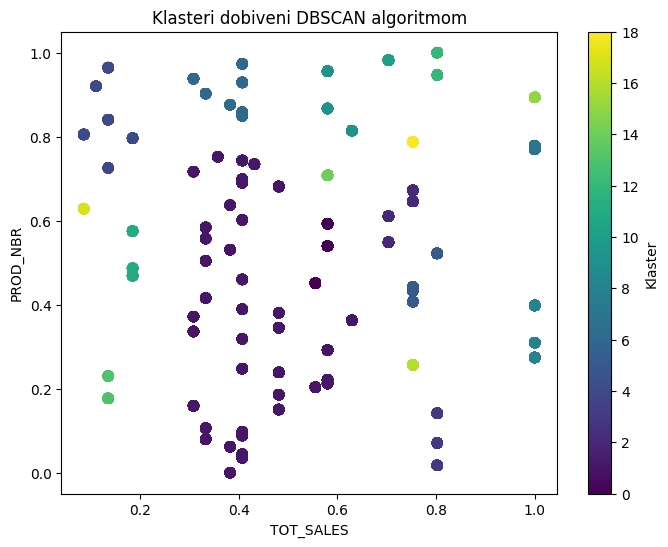

In [ ]:
# Provjerimo broj podataka
print(f"Original number of rows: {len(cleaned_df)}")

# Uzmimo uzorak podataka ako imamo puno redaka
sample_size = 10000  # Na primjer, 10000 redaka
if len(cleaned_df) > sample_size:
    cleaned_df_sampled = cleaned_df.sample(n=sample_size, random_state=42)
else:
    cleaned_df_sampled = cleaned_df

print(f"Sampled number of rows: {len(cleaned_df_sampled)}")

# Podaci za klasteriranje
X = cleaned_df_sampled[['TOT_SALES', 'PROD_NBR']]

# Inicijalizacija i primjena DBSCAN algoritma
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Silhouette koeficijent
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette koeficijent: {silhouette_avg}")
else:
    print("Nedovoljno klastera za izračun Silhouette koeficijenta.")

# Vizualizacija klastera
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('TOT_SALES')
plt.ylabel('PROD_NBR')
plt.title('Klasteri dobiveni DBSCAN algoritmom')
plt.colorbar(label='Klaster')
plt.show()


Original number of rows: 264834
Sampled number of rows: 10000
Silhouette koeficijent: 0.9817290731315852


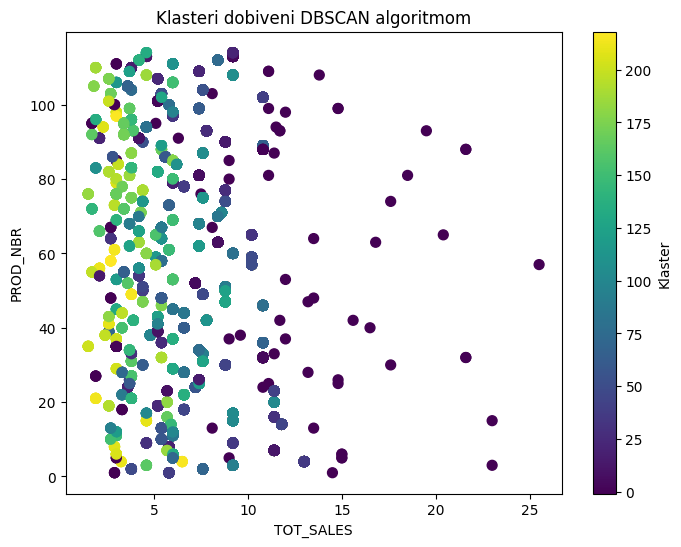

In [ ]:
# Provjerimo broj podataka
print(f"Original number of rows: {len(df)}")

# Uzmimo uzorak podataka ako imamo puno redaka
sample_size = 10000  # Na primjer, 10000 redaka
if len(df) > sample_size:
    df_sampled = df.sample(n=sample_size, random_state=42)
else:
    df_sampled = df

print(f"Sampled number of rows: {len(df_sampled)}")

# Podaci za klasteriranje
X = df_sampled[['TOT_SALES', 'PROD_NBR']]

# Inicijalizacija i primjena DBSCAN algoritma
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Silhouette koeficijent
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette koeficijent: {silhouette_avg}")
else:
    print("Nedovoljno klastera za izračun Silhouette koeficijenta.")

# Vizualizacija klastera
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('TOT_SALES')
plt.ylabel('PROD_NBR')
plt.title('Klasteri dobiveni DBSCAN algoritmom')
plt.colorbar(label='Klaster')
plt.show()


In [ ]:
# Odabir značajki i ciljne varijable
features = df.drop(columns=['TOT_SALES'])
target = df['TOT_SALES']

# Podjela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicijalizacija Random Forest Regresije
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Možete prilagoditi broj estimatora po potrebi

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predikcija na test setu
y_pred = random_forest.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.011956324107463114
R-squared (R2): 0.9981388838488651


In [ ]:
# Odabir značajki i ciljne varijable
features = cleaned_df.drop(columns=['TOT_SALES'])
target = cleaned_df['TOT_SALES']

# Podjela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicijalizacija Random Forest Regresije
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Možete prilagoditi broj estimatora po potrebi

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predikcija na test setu
y_pred = random_forest.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1.3891522702513916e-05
R-squared (R2): 0.9997564523567045
